In [29]:
using EnvelopeApproximation
using EnvelopeApproximation.BubblesEvolution
using EnvelopeApproximation.BubblesIntegration
using StableRNGs
using Base.Iterators
using Measurements
using JLD2
using Plots
using EnvelopeApproximation.Visualization
import EnvelopeApproximation.BubblesEvolution.sample
ENV["JULIA_DEBUG"] = EnvelopeApproximation

EnvelopeApproximation

In [2]:
β = 1.
Δt = β / 100
eg = ExponentialGrowth(β, Δt, Γ_0 = 1.)
bs = BallSpace(1., Point3(0., 0., 0.))

BallSpace(1.0, Point(0.0, 0.0, 0.0))

In [3]:
N = 100
η = 0.8
rng = StableRNG(1)
function ts(state, space, _):: Bool
    ps = sample(rng, N, space)
    cbs = current_bubbles(state)
    length(cbs) == 0. && return false
    inside = sum([p ∈ cbs for p in ps])
    return inside / N ≥ η 
end

ts (generic function with 1 method)

# Dependence on $\Delta t$

In [4]:
Δts = 10 .^ (range(-3., 0., 20))
egs = ExponentialGrowth.(β, Δts, Γ_0 = 1.) 
rngs = StableRNG.(1:30)

30-element Vector{StableRNGs.LehmerRNG}:
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000003)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000005)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000007)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000009)
 StableRNGs.LehmerRNG(state=0x0000000000000000000000000000000b)
 StableRNGs.LehmerRNG(state=0x0000000000000000000000000000000d)
 StableRNGs.LehmerRNG(state=0x0000000000000000000000000000000f)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000011)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000013)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000015)
 ⋮
 StableRNGs.LehmerRNG(state=0x0000000000000000000000000000002d)
 StableRNGs.LehmerRNG(state=0x0000000000000000000000000000002f)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000031)
 StableRNGs.LehmerRNG(state=0x00000000000000000000000000000033)
 StableRNGs.LehmerRNG(state=0x000000000000000000000000000000

In [5]:
_evolve(eg, rng) = evolve(eg, bs, termination_strategy=ts, rng=rng)
_evolve(t:: Tuple) = _evolve(t...)

_evolve (generic function with 2 methods)

In [6]:
evolves = _evolve.(product(egs, rngs))

┌ Info: Initiating PT of BubblesSnapShot(NamedTuple{(:time, :site)}[], 0.0, EnvelopeApproximation.BubblesEvolution.speed_of_light_profile)
└ @ EnvelopeApproximation.BubblesEvolution /home/ben/.julia/dev/EnvelopeApproximation/src/BubblesEvolution.jl:120
┌ Debug: A total of 0 nucleations was sampled in accordance with the expected mean of 0.0010005001667083846
└ @ EnvelopeApproximation.BubblesEvolution /home/ben/.julia/dev/EnvelopeApproximation/src/BubblesEvolution.jl:98
┌ Debug: NaN% of the sampled sites are within the true vacuum
└ @ EnvelopeApproximation.BubblesEvolution /home/ben/.julia/dev/EnvelopeApproximation/src/BubblesEvolution.jl:101
┌ Debug: A total of 0 nucleations was sampled in accordance with the expected mean of 0.0010015011672919183
└ @ EnvelopeApproximation.BubblesEvolution /home/ben/.julia/dev/EnvelopeApproximation/src/BubblesEvolution.jl:98
┌ Debug: NaN% of the sampled sites are within the true vacuum
└ @ EnvelopeApproximation.BubblesEvolution /home/ben/.julia/dev/Env

20×30 Matrix{BubblesSnapShot}:
 BubblesSnapShot(NamedTuple{(:time, :site)}[(time = 0.0406108, site = (-0.644664, 0.311683, -0.172239)), (time = 0.170036, site = (0.385425, -0.59171, 0.383204)), (time = 0.787035, site = (0.649479, 0.155754, 0.303459))], 1.018, speed_of_light_profile)                                                                                                                                                                                                                                                                                                                 …  BubblesSnapShot(NamedTuple{(:time, :site)}[(time = 1.24785, site = (-0.302735, 0.290343, -0.328323)), (time = 1.77597, site = (0.203404, -0.830296, -0.226855)), (time = 1.94416, site = (0.747788, -0.382663, -0.0868087)), (time = 2.07574, site = (0.77163, -0.434757, 0.329141)), (time = 2.09102, site = (-0.271128, -0.583361, 0.0695712)), (time = 2.12071, site = (0.170935, 0.279791, 0.86748))], 2.299, speed_o

## Mean number of nucleations

In [7]:
mean(x) = sum(x) / length(x)
std(x) = sqrt(sum(x .^ 2) .- mean(x) ^ 2) / (sqrt(length(x) * (length(x) - 1)))
average(x) = mean(x) ± std(x) 
mean_nucleations(x) = average((z -> length(z.nucleations)).(x))

mean_nucleations (generic function with 1 method)

In [8]:
nucs = mean_nucleations.(eachrow(evolves))

20-element Vector{Measurement{Float64}}:
 3.97 ± 0.82
 3.37 ± 0.7
 3.47 ± 0.69
 4.27 ± 0.89
 3.93 ± 0.79
  3.4 ± 0.66
 4.57 ± 0.94
 3.83 ± 0.77
 4.37 ± 0.91
 3.93 ± 0.82
 3.33 ± 0.71
 3.97 ± 0.81
 4.23 ± 0.85
  4.5 ± 0.9
 4.47 ± 0.94
  4.8 ± 1.1
 4.97 ± 0.98
  5.8 ± 1.2
  5.9 ± 1.2
  7.2 ± 1.4

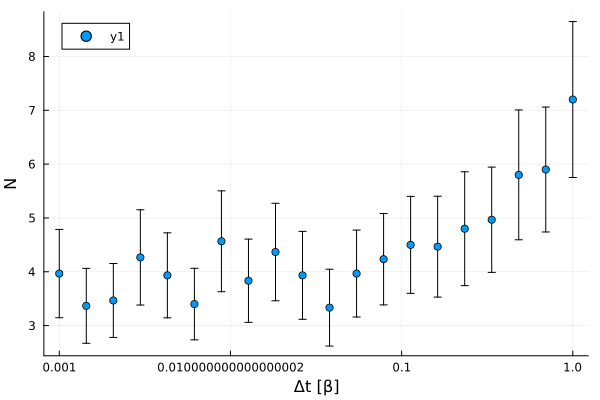

In [9]:
custom_xticks = 10. .^(-3, -2, -1, 0)
custom_xticks_strs = ["$f" for f in custom_xticks]
scatter(Δts, nucs, xscale=:log10, xticks=(custom_xticks, custom_xticks_strs), xlabel="Δt [β]", ylabel="N")

## Mean PT time

In [10]:
pt_time(x) = average((z -> z.t).(x))

pt_time (generic function with 1 method)

In [11]:
pt_times = pt_time.(eachrow(evolves))

20-element Vector{Measurement{Float64}}:
 1.71 ± 0.32
 1.62 ± 0.3
 1.72 ± 0.32
 1.77 ± 0.33
 1.59 ± 0.3
 1.65 ± 0.31
 1.89 ± 0.35
 1.95 ± 0.36
 1.74 ± 0.33
 1.72 ± 0.32
 1.65 ± 0.31
 1.75 ± 0.32
 1.78 ± 0.33
 1.77 ± 0.33
 1.92 ± 0.36
 1.87 ± 0.35
 1.92 ± 0.36
 2.21 ± 0.41
 2.02 ± 0.38
 2.23 ± 0.42

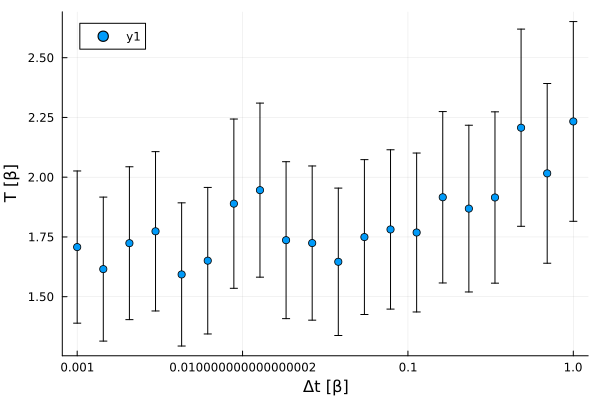

In [12]:
scatter(Δts, pt_times, xscale=:log10, xticks=(custom_xticks, custom_xticks_strs), xlabel="Δt [β]", ylabel="T [β]")

# Study dependence on Space Size

In [13]:
radii = range(1., 10., 10)

1.0:1.0:10.0

In [14]:
max_R = radii[end]

10.0

In [15]:
function _evolve(radius:: Float64, rng)
    eg = ExponentialGrowth(β, Δt, Γ_0 = (4π/3) * (radius / max_R) ^3)
    bs = BallSpace(radius, Point3(0., 0., 0.))
    return evolve(eg, bs, termination_strategy=ts, rng=rng)
end

_evolve(t:: Tuple) = _evolve(t...)

_evolve (generic function with 3 methods)

In [16]:
evolves = _evolve.(product(radii, rngs))

10×30 Matrix{BubblesSnapShot}:
 BubblesSnapShot(NamedTuple{(:time, :site)}[(time = 4.53971, site = (-0.191744, 0.65591, -0.573263)), (time = 5.27176, site = (0.256343, -0.678565, -0.687028)), (time = 5.27429, site = (-0.795287, -0.576746, -0.0366006))], 5.86, speed_of_light_profile)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [17]:
using EnvelopeApproximation.BubblesIntegration

In [18]:
viz(evolves[10, 1])

In [19]:
total_vol = (4π / 3) * radii[10] ^ 3

4188.790204786391

In [20]:
vol = volume_integral(x -> 1., current_bubbles(evolves[10, 7]), 1. / (3 * 10), (2π / 10.), (2. / 10))

3801.148751319484

In [21]:
vol / total_vol

0.9074574198001222

## Nucleations num

In [22]:
nucs = mean_nucleations.(eachrow(evolves))

10-element Vector{Measurement{Float64}}:
  2.23 ± 0.47
  4.53 ± 0.98
   9.4 ± 1.9
  18.3 ± 3.6
  34.0 ± 6.6
  62.0 ± 12.0
  89.0 ± 17.0
 134.0 ± 25.0
 186.0 ± 34.0
 241.0 ± 45.0

In [23]:
nucs

10-element Vector{Measurement{Float64}}:
  2.23 ± 0.47
  4.53 ± 0.98
   9.4 ± 1.9
  18.3 ± 3.6
  34.0 ± 6.6
  62.0 ± 12.0
  89.0 ± 17.0
 134.0 ± 25.0
 186.0 ± 34.0
 241.0 ± 45.0

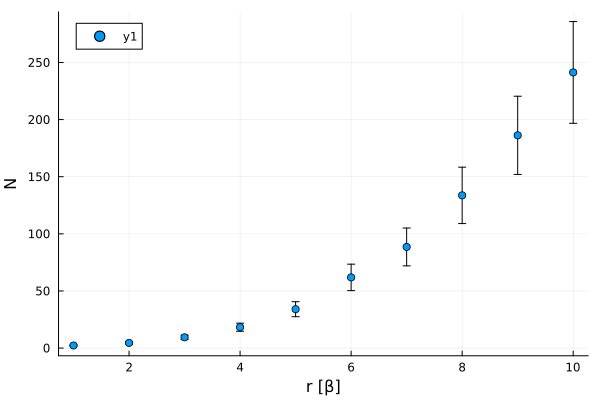

In [24]:
scatter(radii, nucs, xlabel="r [β]", ylabel="N")

## Mean PT time

In [25]:
pt_time(x) = average((z -> z.t).(x))

pt_time (generic function with 1 method)

In [26]:
pt_times = pt_time.(eachrow(evolves))

10-element Vector{Measurement{Float64}}:
  5.9 ± 1.1
 5.11 ± 0.95
 4.74 ± 0.87
 4.64 ± 0.85
 4.68 ± 0.86
 4.71 ± 0.86
 4.62 ± 0.85
 4.63 ± 0.85
 4.65 ± 0.85
 4.57 ± 0.84

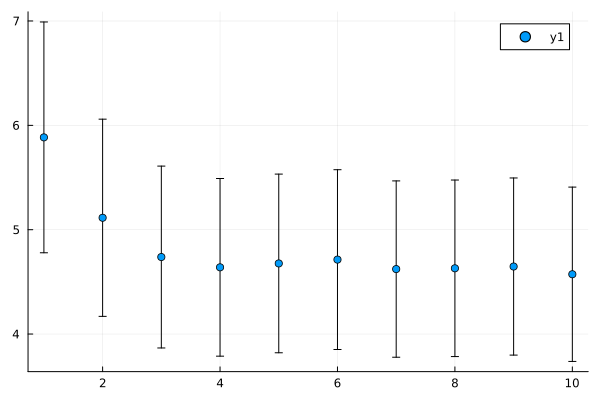

In [28]:
scatter(radii, pt_times)

# Saving the Data

In [31]:
jldsave("evolution_ensemble.jld2"; space_size=evolves)